In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e6/sample_submission.csv
/kaggle/input/playground-series-s3e6/train.csv
/kaggle/input/playground-series-s3e6/test.csv


## Data Visualization and Wrangling

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e6/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e6/test.csv")
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e6/sample_submission.csv")

In [3]:
train.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [4]:
test.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9


### Dropping Unrelate Features

In [5]:
drop_clomumns = ['id','cityCode']
train_df = train.drop(drop_clomumns, axis=1)
test_df = test.drop(drop_clomumns, axis=1)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       22730 non-null  int64  
 1   numberOfRooms      22730 non-null  int64  
 2   hasYard            22730 non-null  int64  
 3   hasPool            22730 non-null  int64  
 4   floors             22730 non-null  int64  
 5   cityPartRange      22730 non-null  int64  
 6   numPrevOwners      22730 non-null  int64  
 7   made               22730 non-null  int64  
 8   isNewBuilt         22730 non-null  int64  
 9   hasStormProtector  22730 non-null  int64  
 10  basement           22730 non-null  int64  
 11  attic              22730 non-null  int64  
 12  garage             22730 non-null  int64  
 13  hasStorageRoom     22730 non-null  int64  
 14  hasGuestRoom       22730 non-null  int64  
 15  price              22730 non-null  float64
dtypes: float64(1), int64(1

In [7]:
train_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [8]:
train_df['made']

0        2000
1        2000
2        2020
3        2000
4        2018
         ... 
22725    2000
22726    2015
22727    2014
22728    2000
22729    2018
Name: made, Length: 22730, dtype: int64

### NaN Value

In [9]:
## Finding NaN Value
train_df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [10]:
test_df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64

### Duplicate Value

In [11]:
### Finding any Duplicate Value
train_df[train_df.duplicated()]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price


In [12]:
test_df[test_df.duplicated()]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom


### Finding Outliers

In [13]:
train_df['made'].unique()

array([ 2000,  2020,  2018,  1998,  2017,  2003,  1994,  1993,  2009,
        2014,  2011,  1996,  2015,  2004,  2019,  2008,  2005,  2007,
        2016,  1995,  2006,  1997,  2013,  2021,  1999,  2001,  1990,
        2010,  1991,  2012,  1992, 10000,  2002])

In [14]:
mask = train_df.index[train_df['made'] > 2023].tolist()

train_df.drop(mask,inplace=True)

In [15]:
mask = test_df.index[test_df['made'] > 2023].tolist()

test_df.drop(mask,inplace=True)

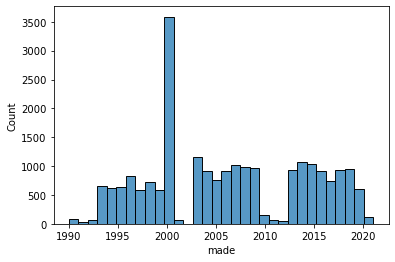

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('made')
sns.histplot(data=train_df , x='made');

### Price Distribution

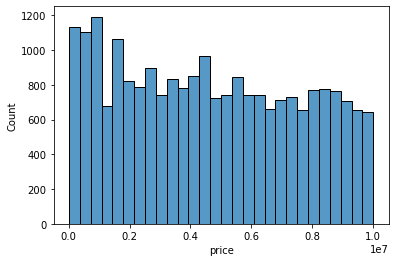

In [17]:
plt.xlabel('price')
sns.histplot(data=train_df , x='price');

array([[<AxesSubplot:title={'center':'squareMeters'}>,
        <AxesSubplot:title={'center':'numberOfRooms'}>,
        <AxesSubplot:title={'center':'hasYard'}>,
        <AxesSubplot:title={'center':'hasPool'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'cityPartRange'}>,
        <AxesSubplot:title={'center':'numPrevOwners'}>,
        <AxesSubplot:title={'center':'made'}>],
       [<AxesSubplot:title={'center':'isNewBuilt'}>,
        <AxesSubplot:title={'center':'hasStormProtector'}>,
        <AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'attic'}>],
       [<AxesSubplot:title={'center':'garage'}>,
        <AxesSubplot:title={'center':'hasStorageRoom'}>,
        <AxesSubplot:title={'center':'hasGuestRoom'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

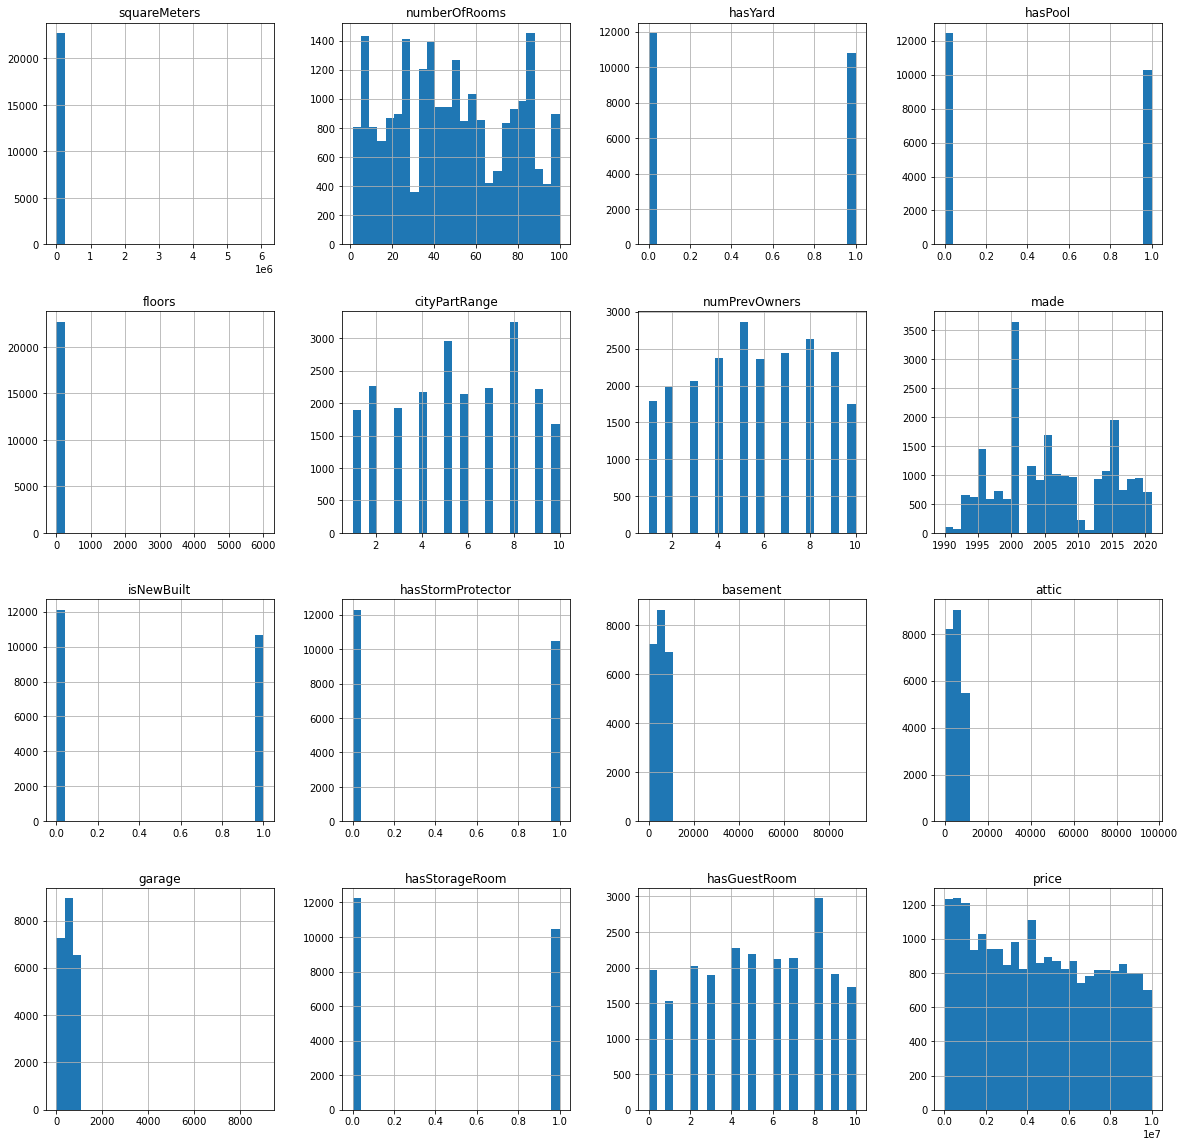

In [18]:
train_df.hist(figsize=(20, 20), bins=25)

### Correlation Between Data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

train_df.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.056686,-0.006441,-0.001550,0.017768,0.002684,-0.000158,0.081092,0.010383,0.017919,-0.018965,-0.008419,-0.063875,0.006083,-0.005718,0.591701
numberOfRooms,0.056686,1.000000,-0.000989,0.000264,0.044125,0.012282,0.021985,-0.035041,-0.008922,0.011734,0.023590,0.027277,0.066895,-0.007617,-0.015936,0.091570
hasYard,-0.006441,-0.000989,1.000000,-0.068600,-0.010548,-0.002119,-0.002428,0.000144,0.001634,0.005021,-0.011810,-0.003336,-0.001242,0.006688,-0.007904,-0.002423
hasPool,-0.001550,0.000264,-0.068600,1.000000,-0.000472,-0.002589,0.000447,-0.001404,0.033027,0.014966,0.003226,-0.001014,0.007163,0.016263,-0.006895,0.006136
floors,0.017768,0.044125,-0.010548,-0.000472,1.000000,0.000892,0.009165,-0.029440,-0.005735,-0.002372,0.007809,-0.006302,0.023917,-0.007899,-0.020746,0.038270
cityPartRange,0.002684,0.012282,-0.002119,-0.002589,0.000892,1.000000,0.021585,0.009850,0.002350,-0.000359,0.000340,0.010343,-0.001869,0.003578,0.018316,-0.009461
numPrevOwners,-0.000158,0.021985,-0.002428,0.000447,0.009165,0.021585,1.000000,0.016040,-0.001054,-0.013019,-0.005596,0.001048,-0.004894,0.000999,0.013179,-0.008562
made,0.081092,-0.035041,0.000144,-0.001404,-0.029440,0.009850,0.016040,1.000000,-0.000098,-0.002929,0.034554,0.025501,0.031637,-0.011608,0.023859,0.123189
isNewBuilt,0.010383,-0.008922,0.001634,0.033027,-0.005735,0.002350,-0.001054,-0.000098,1.000000,0.024006,-0.001747,-0.000071,0.010853,0.027493,0.010499,0.008136
hasStormProtector,0.017919,0.011734,0.005021,0.014966,-0.002372,-0.000359,-0.013019,-0.002929,0.024006,1.000000,-0.017585,-0.001355,0.020522,0.017531,-0.001690,0.020567


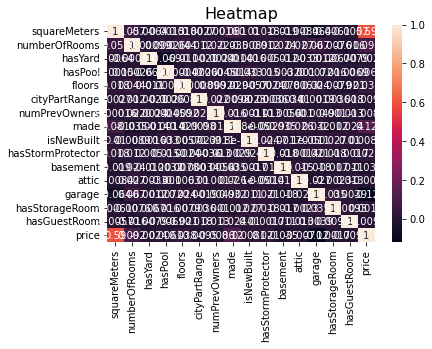

In [20]:
sns.heatmap(train_df.corr(), annot=True);
plt.title("Heatmap", fontsize=16);

### Standardization Varaibles and Dummy Variables

In [21]:
train_df['made'].unique()

array([2000, 2020, 2018, 1998, 2017, 2003, 1994, 1993, 2009, 2014, 2011,
       1996, 2015, 2004, 2019, 2008, 2005, 2007, 2016, 1995, 2006, 1997,
       2013, 2021, 1999, 2001, 1990, 2010, 1991, 2012, 1992, 2002])

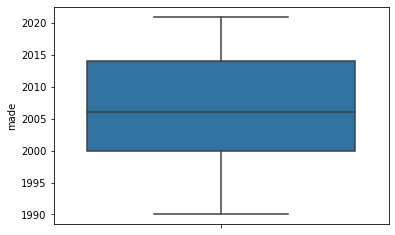

In [22]:
sns.boxplot(data = train_df , y = 'made');

In [23]:
## Converting Numerical data into Object

# define custom function to categorize Made
def categorize_made(made):
    if made < 2000:
        return 'Old'
    elif (made < 2010 and made > 2000):
        return 'New'
    else:
        return 'Newer'  
    
train_df['made'] = train_df['made'].apply(categorize_made)
test_df['made'] = test_df['made'].apply(categorize_made)

In [24]:
train_df['made'].unique()

array(['Newer', 'Old', 'New'], dtype=object)

### Data Normalization

In [25]:
# Dummy Variables
def getDummy(raw_data):
    df = raw_data
    dummy = pd.get_dummies(df['made'], drop_first=True)
    df = pd.concat([df, dummy], axis=1)
    #Dropping Dummy Varaibles
    df.drop(['made'], axis=1, inplace=True)
    
    return df

train_df = getDummy(train_df)
test_df = getDummy(test_df)

In [26]:
train_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,Newer,Old
0,34291,24,1,0,47,2,1,0,1,8,5196,369,0,3,3436795.2,1,0
1,95145,60,0,1,60,1,4,0,1,729,4496,277,0,6,9519958.0,1,0
2,92661,45,1,1,62,4,8,1,1,7473,8953,245,1,9,9276448.1,1,0
3,97184,99,0,0,59,1,1,0,1,6424,8522,256,1,9,9725732.2,1,0
4,61752,100,0,0,57,8,4,1,0,7151,2786,863,0,7,6181908.8,1,0


In [27]:
from sklearn import preprocessing

# Function to Normalized data
def normalizing_data(raw_data):
  
  df = raw_data

  zz_dataype = ['int64']
    
  zz_feature_list = []
  
  dependent_var = ['price']

  features = df.columns
    
  for feature in features:
    if (df.dtypes[feature] in zz_dataype) and ( feature not in dependent_var):
        zz_feature_list.append(feature)
        print("ZZ varaibles for Scaling  : {} ".format(feature))
          
        df[feature] = preprocessing.scale(df[feature])

  return df

In [28]:
train_df = normalizing_data(train_df)

ZZ varaibles for Scaling  : squareMeters 
ZZ varaibles for Scaling  : numberOfRooms 
ZZ varaibles for Scaling  : hasYard 
ZZ varaibles for Scaling  : hasPool 
ZZ varaibles for Scaling  : floors 
ZZ varaibles for Scaling  : cityPartRange 
ZZ varaibles for Scaling  : numPrevOwners 
ZZ varaibles for Scaling  : isNewBuilt 
ZZ varaibles for Scaling  : hasStormProtector 
ZZ varaibles for Scaling  : basement 
ZZ varaibles for Scaling  : attic 
ZZ varaibles for Scaling  : garage 
ZZ varaibles for Scaling  : hasStorageRoom 
ZZ varaibles for Scaling  : hasGuestRoom 


In [29]:
test_df = normalizing_data(test_df)

ZZ varaibles for Scaling  : squareMeters 
ZZ varaibles for Scaling  : numberOfRooms 
ZZ varaibles for Scaling  : hasYard 
ZZ varaibles for Scaling  : hasPool 
ZZ varaibles for Scaling  : floors 
ZZ varaibles for Scaling  : cityPartRange 
ZZ varaibles for Scaling  : numPrevOwners 
ZZ varaibles for Scaling  : isNewBuilt 
ZZ varaibles for Scaling  : hasStormProtector 
ZZ varaibles for Scaling  : basement 
ZZ varaibles for Scaling  : attic 
ZZ varaibles for Scaling  : garage 
ZZ varaibles for Scaling  : hasStorageRoom 
ZZ varaibles for Scaling  : hasGuestRoom 


In [30]:
train_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,Newer,Old
0,-0.248133,-0.858676,1.049311,-0.909672,-0.006306,-1.308584,-1.703079,-0.937898,1.083425,-1.731327,0.041462,-0.587636,-0.926192,-0.704883,3436795.2,1,0
1,0.980660,0.416687,-0.953006,1.099297,0.265778,-1.673615,-0.597357,-0.937898,1.083425,-1.494710,-0.184532,-0.922379,-0.926192,0.277042,9519958.0,1,0
2,0.930502,-0.114714,1.049311,1.099297,0.307637,-0.578523,0.876939,1.066214,1.083425,0.718528,1.254407,-1.038812,1.079690,1.258967,9276448.1,1,0
3,1.021832,1.798330,-0.953006,-0.909672,0.244848,-1.673615,-1.703079,-0.937898,1.083425,0.374268,1.115259,-0.998788,1.079690,1.258967,9725732.2,1,0
4,0.306373,1.833757,-0.953006,-0.909672,0.202989,0.881599,-0.597357,1.066214,-0.922999,0.612854,-0.736605,1.209788,-0.926192,0.604350,6181908.8,1,0


## Building Model

In [31]:
from sklearn.model_selection import train_test_split
## Spliting the data
y = train_df['price']
X = train_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 345)

In [32]:
print("X Train Shape : {}".format(X_train.shape))
print("y train Shape : {}".format(y_train.shape))
print("X Test Shape : {}".format(X_test.shape))
print("y Test Shape : {}".format(y_test.shape))

X Train Shape : (18180, 16)
y train Shape : (18180,)
X Test Shape : (4545, 16)
y Test Shape : (4545,)


## DecisionTreeRegressor

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,classification_report,accuracy_score

mdl = DecisionTreeRegressor()

# Training the model
mdl.fit(X_train, y_train)
pred = mdl.predict(X_test)

In [34]:
print("RMSE: %.2f" %(mean_squared_error(y_test, pred)) ** 0.5)
print("Variance Score R-Squared: %.2f" %r2_score(y_test,pred))
print("MSE θ zero Intercept: %.2f" %mean_squared_error(y_test, pred))


RMSE: 141638.90
Variance Score R-Squared: 1.00
MSE θ zero Intercept: 20061578325.00


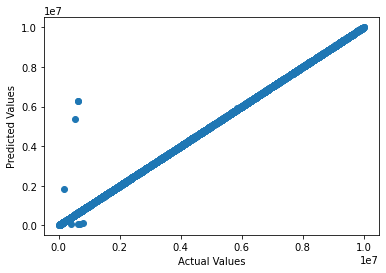

In [35]:
plt.scatter(y_test, pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Prediction using test data


In [36]:
y_pred = mdl.predict(test_df)

In [37]:
dependent_var = pd.DataFrame(y_pred, columns =['price'])

df = pd.concat([test,dependent_var],axis =1)

In [38]:
submission = df[["id", "price"]]

In [39]:
submission.head()

,id,price
0,22730,4984739.1
1,22731,7436951.4
2,22732,10004278.3
3,22733,10313.5
4,22734,8359050.2


In [40]:
submission.to_csv("submit.csv", index=False)